<a href="https://colab.research.google.com/github/Rushabhbhagat08/InternSavy/blob/main/Customer_Segmentation_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

In [ ]:
customer_data=pd.read_csv('/content/drive/MyDrive/InternSavy/Customer segementation/Mall_Customers.csv')

In [ ]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
customer_data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
customer_data.shape

(200, 5)

In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
customer_data['CustomerID'].value_counts()

1      1
138    1
128    1
129    1
130    1
      ..
70     1
71     1
72     1
73     1
200    1
Name: CustomerID, Length: 200, dtype: int64

In [ ]:
# Dataset Columns
customer_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

###Variables Description

1. Customer ID : A unique value of each customers
2. Gender : gender of the customers
3. Age : Age of the customers.
4. Annual Income : Individual annual income of each customer
5. Spending Score : Total spending in each customer.


<Axes: >

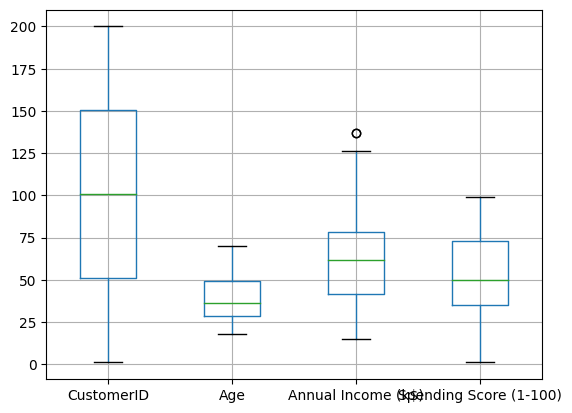

In [ ]:
customer_data.boxplot()

In [ ]:

# droping serial no. column from the dataset not required for the prediction
data=customer_data.copy()
data.drop(['Gender'],axis=1,inplace=True)

In [ ]:
# Calculate Quartile Of each feature
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

CustomerID                98.50
Age                       20.75
Annual Income (k$)        37.25
Spending Score (1-100)    37.75
dtype: float64


In [ ]:

#identity the outliers from the dataset
df_out=data[((data < (Q1-1.5*IQR))| (data >(Q3+1.5*IQR))).any(axis=1)]
df_out.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [ ]:
# removing Outliers from the data
df_out=data[~((data < (Q1-1.5*IQR))| (data >(Q3+1.5*IQR))).any(axis=1)]
customer_data=df_out.copy()
print(customer_data.shape)

(198, 5)


<Axes: >

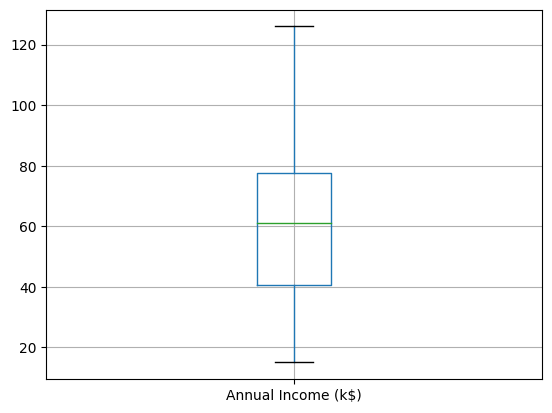

In [ ]:
customer_data.boxplot(column=['Annual Income (k$)'])

##**Expolatory Data Analysis(EDA)**

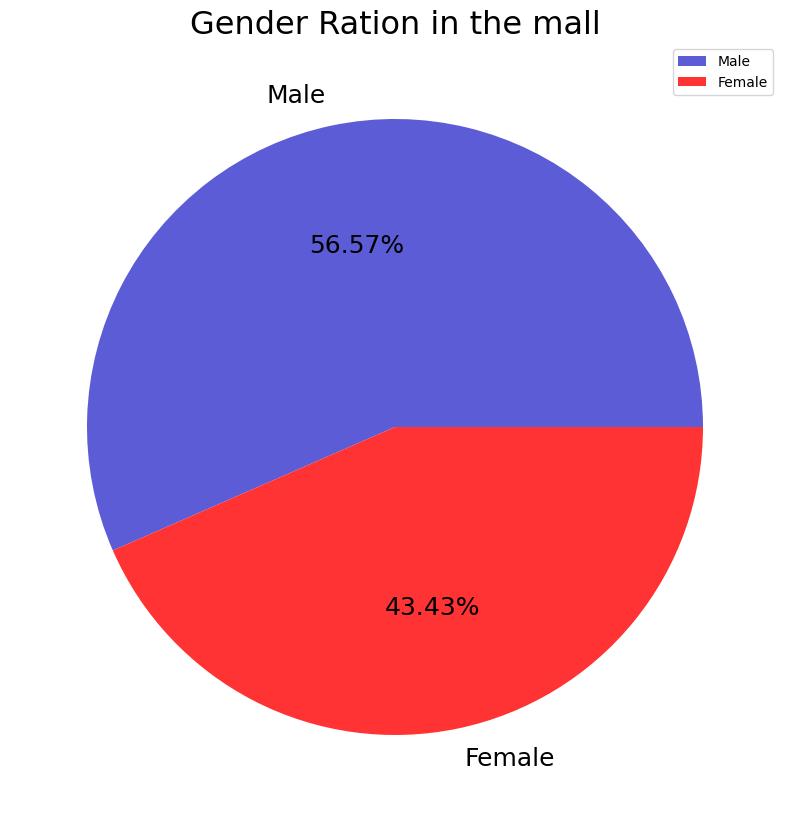

In [ ]:
#create a labels
data = customer_data['Gender'].value_counts()
labels = ['Male', 'Female']

# create pie chart
plt.figure(figsize=(10,10))
colors = ["#5c5cd6","#ff3333"]
explode=(0.01,0.1)
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',textprops={'fontsize': 18})
plt.title('Gender Ration in the mall',size=23,loc='center')
plt.legend()

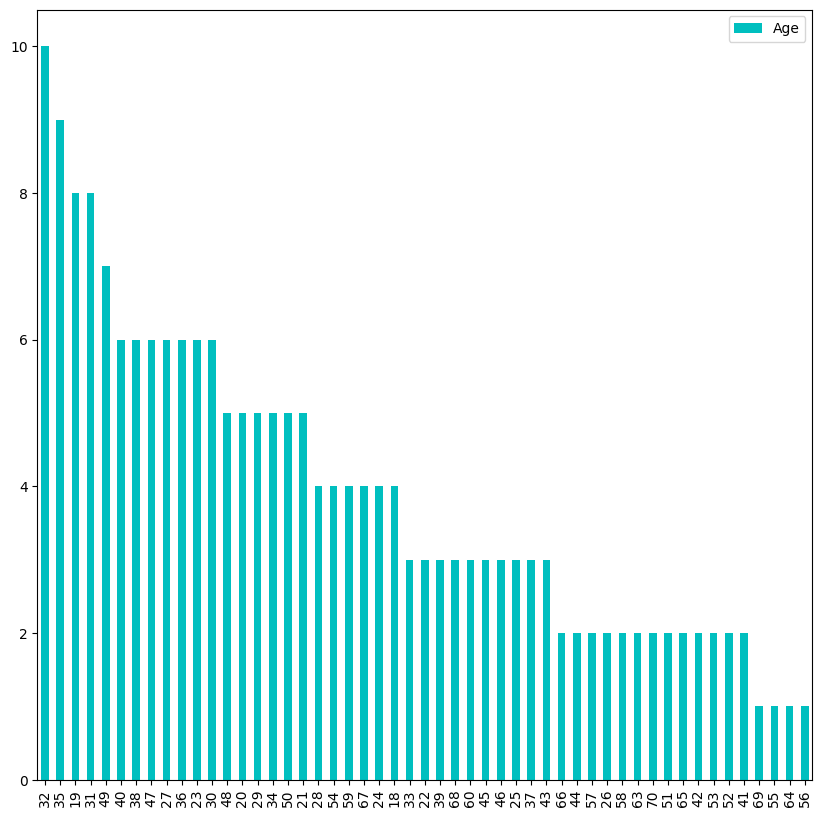

In [ ]:
customer_data['Age'].value_counts().plot.bar(figsize=(10,10),color='c')
plt.legend()

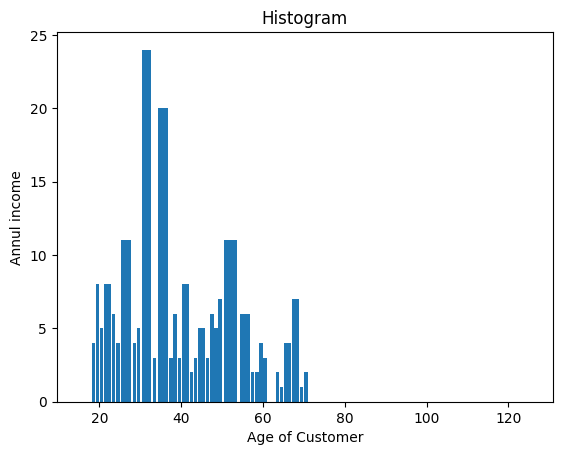

In [ ]:
age = customer_data['Age']
Annul_income=customer_data['Annual Income (k$)']
plt.hist(age, Annul_income, histtype='bar', rwidth=0.8)
plt.xlabel('Age of Customer')
plt.ylabel('Annul income')
plt.title('Histogram')
plt.show()